<a href="https://colab.research.google.com/github/HSB613/code-practice/blob/main/n132%20-%20PCA/n132a%20-%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 2*

# 📝 Assignment



# 🌱 **기본 과제**

## **Part 1. Eigenstuff**

- 벡터 $[2, 1]$이 $T$에 의해 변환된 벡터는 무엇인지 구하세요.
- 벡터 $[-1, 2]$가 $T$에 의해 변환된 벡터는 무엇인지 구하세요.
- numpy를 사용하여 $T$에 대한 eigenvalue와 eigenvector를 구하세요. 
> $T = \begin{bmatrix} 9 & 4 \\ 4 & 3 \end{bmatrix}$

##### **Q1. 벡터 $[2, 1]$이 $T$에 의해 변환된 벡터를 스칼라곱 형태로 나타내었을 때, 스칼라 값과 벡터를 ($1, [2,3]$) 형태로 쓰세요.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

v1 = [2,1]
T = [[9,4],[4,3]]

v1 = np.array(v1)
T = np.array(T)

v1T = np.matmul(v1,T)

print(v1T)

[22 11]


##### **Q2. 벡터 $[-1, 2]$가 $T$에 의해 변환된 벡터를 스칼라곱 형태로 나타내었을 때, 스칼라 값과 벡터를 ($1, [2, 3]$) 형태로 쓰세요.**

In [ ]:
v2 = [-1,2]

v2 = np.array(v2)

v2T = np.matmul(v2,T)

print(v2T)

[-1  2]


##### **Q3. Numpy를 사용하여 구한 $T$의 eigenvalue에 따른 eigenvector를 ($1, [2, 3]$) 형태로 모두 쓰세요. (단, eigenvector의 각 성분은 반올림하여 소수점 둘째 자리까지 구하세요.)**

In [ ]:
T_eigenstuff = np.linalg.eig(T)
T_eigenstuff

(array([11.,  1.]),
 array([[ 0.89442719, -0.4472136 ],
        [ 0.4472136 ,  0.89442719]]))

## **Part 2. PCA**

### **2-1. 데이터셋 준비하기**

- 다음 링크를 참조하여 `penguins` 데이터셋을 불러오세요. <br>
  <http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>
- `species` column은 변수 `species`에 따로 저장해 두세요. 
- 4개의 numerical feature `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`만 추출하여 데이터프레임 형태로 저장하세요. 
  - 데이터프레임의 이름은 `features`로 합니다. 
- `features` 데이터프레임의 결측치가 있는 row를 출력하여 확인 후 제거하세요. 
  - 결측치 제거 후 데이터프레임의 인덱스를 초기화합니다.

##### **Q4. 결측치가 포함된 row는 모두 몇 개인지 쓰세요.**

In [ ]:
from xml.sax.handler import feature_string_interning

penguins_df = sns.load_dataset("penguins")

features_df = penguins_df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
features_df = features_df.dropna().reset_index(drop=True)
feature_nan = penguins_df.isnull().sum()
print(feature_nan)

nan_index = penguins_df[(penguins_df['bill_length_mm'].isnull()) | (penguins_df['bill_depth_mm'].isnull()) | (penguins_df['flipper_length_mm'].isnull()) | (penguins_df['body_mass_g'].isnull())].index
species_sris = penguins_df.species.drop([penguins_df.index[3], penguins_df.index[339]]).reset_index(drop=True)
print(species_sris)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
337    Gentoo
338    Gentoo
339    Gentoo
340    Gentoo
341    Gentoo
Name: species, Length: 342, dtype: object


### **2-2. PCA**

- 데이터를 표준화 하세요. 
- 표준화한 데이터에 대하여 PCA를 시행하세요. 
  - PC(주성분)는 2개로 합니다. 
- 두 PC에 대하여 scatter plot을 그리세요. 
  - seaborn 라이브러리의 `.scatterplot()`에서 `hue` 파라미터를 `species`로 설정해 보세요. 
- 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

##### **Q5. scatter plot에서 가장 오른쪽에 위치한 펭귄의 species는 무엇인지 쓰세요.**

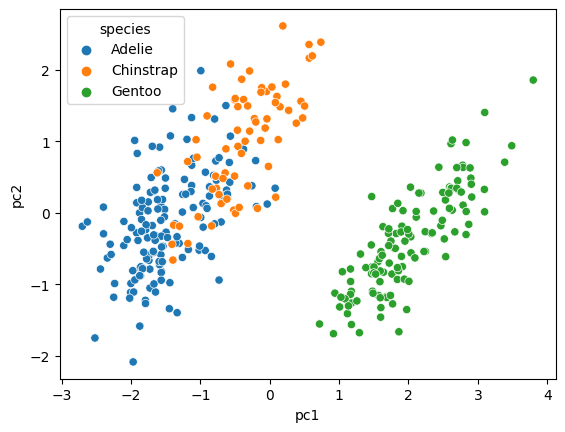

In [ ]:
std_df = StandardScaler().fit_transform(features_df)

pca = PCA(n_components=2) #n주성분 2개로 축소
pca.fit(std_df)
pj_array = pca.transform(std_df)
pj_df = pd.DataFrame(data=pj_array, columns =['pc1','pc2'])
pj_feat = pd.concat([pj_df,species_sris],axis=1)
pj_feat

sns.scatterplot(x='pc1', y='pc2', data=pj_feat, hue='species')
plt.show()

##### **Q6. 2개의 PC를 이용하여 설명되는 variance의 ratio의 합은 몇 %인지 고르세요.**
- 60% 미만
- 60% 이상 70% 미만
- 70% 이상 80% 미만
- 80% 이상 

In [ ]:
ratio = pca.explained_variance_ratio_
ratio_sum = ratio[0] + ratio[1]
print(round(ratio_sum, 3))

0.882


# 🥇 **도전 과제** 

## **Part 3. Scree Plot**
> **Part 2**에서 표준화한 데이터셋을 계속 사용합니다. 

- **PCA의 PC를 4개로 하여 "Scree Plot"을 만들어 보세요.** 
  - 몇 개의 PC를 사용하는 게 가장 적절한지 논리적으로 설명해 보세요. 
  - 90%의 내용을 설명하기 위해서는 몇 개의 PC를 사용해야 하는지 쓰세요.


In [ ]:
pca = PCA(n_components=4) #n주성분 2개로 축소
pca_array = pca.fit_transform(std_df)
pca_df = pd.DataFrame(data=pca_array, columns =['pc1','pc2','pc3','pc4'])
pca_feat = pd.concat([pca_df,species_sris],axis=1)
pca_feat

scree_df = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                         '기여율':pca.explained_variance_ratio_},
                        index=np.array([f"pc{num+1}" for num in range(std_df.shape[1])]))
scree_df['누적기여율'] = scree_df['기여율'].cumsum()

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pc1,2.761831,0.688439,0.688439
pc2,0.774782,0.193129,0.881568
pc3,0.366307,0.091309,0.972877
pc4,0.108810,0.027123,1.000000


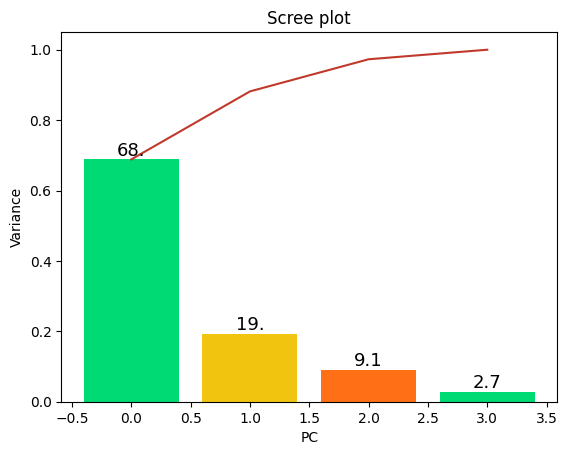

In [ ]:
# scree plot으로 나타내는 함수 정의 
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
  
scree_plot(pca)